In [19]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#lendo o arquivo csv que contem os dados
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/mkt_data.csv")

In [22]:
#Verificando as primeiras linhas do nosso dataset:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [24]:
#Verificando o tamanho do dataset (quantidade de linhas e colunas):
df.shape

(2205, 44)

In [25]:
#Verificando os tipos de colunas do nosso dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [26]:
#Verificando a existência de dados duplicados e a ocorrência deles:
df.duplicated().value_counts()

,count
False,2205


In [27]:
# Eliminando Coluna "Unnamed: 0"
df = df.drop("Unnamed: 0", axis=1)

In [28]:
# Verificando novamente quantidade de duplicados
df.duplicated().sum()

np.int64(184)

In [29]:
# removendo dados duplicados
df = df.drop_duplicates()

In [30]:
#somando os nulos da base
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [31]:
#contando as ocorrências de um valor na coluna education_PhD: o .value_counts() conta apenas os registros não nulos.
df.education_PhD.value_counts()

,count
education_PhD,
5.0,439


In [33]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

In [34]:
#substituindo por booleano

for item in colunas_com_nulos:
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1) #se for nulo, substituimos por 0, caso contrário substituimos por 1

In [35]:
#observem as ultimas colunas
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,1,0,0,0,0,1,0,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,1,0,0,0,0,0,1,0,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,0,0,0,0,1,0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,0,0,0,1,0


In [36]:
# utilizando o .describe() para mostrar as principais estatísticas das colunas numéricas de interesse.

df[["kids", "Income", "expenses"]].describe()

,kids,Income,expenses
count,2021.000000,2021.000000,2021.000000
mean,0.952994,51687.258783,563.789213
std,0.746123,20713.046401,576.775749
min,0.000000,1730.000000,4.000000
25%,0.000000,35416.000000,55.000000
50%,1.000000,51412.000000,343.000000
75%,1.000000,68274.000000,964.000000
max,3.000000,113734.000000,2491.000000


# Entendendo o perfil do cliente:
1 -  Renda:
Menor e maior salário encontrado na nossa base (rendimento anual):


In [38]:
menor_salario = df.Income.min()
maior_salario = df.Income.max()

print('O menor salário encontrado foi:', menor_salario )
print('O maior salário encontrado foi:', maior_salario )

O menor salário encontrado foi: 1730.0
O maior salário encontrado foi: 113734.0


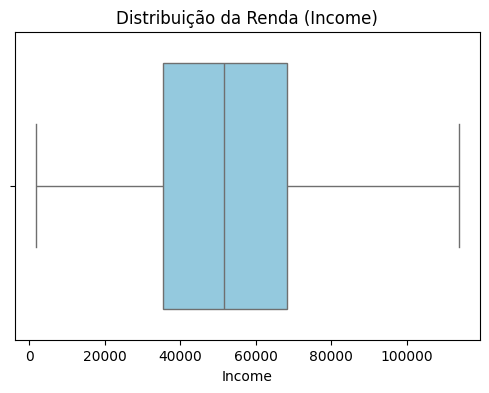

In [47]:
#Distribuição de salário dos clientes do nosso dataset:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Income"], color="skyblue")  # cor única sem precisar de hue
plt.title("Distribuição da Renda (Income)")
plt.show()

Apesar da grande disperção de valores, com algumas pessoas ganhando pouco e outras ganhando muito, não notamos outliers na nossa base. A maior parte dos nossos clientes recebem entre 35000 e 70000 anual.

2 - Educação:


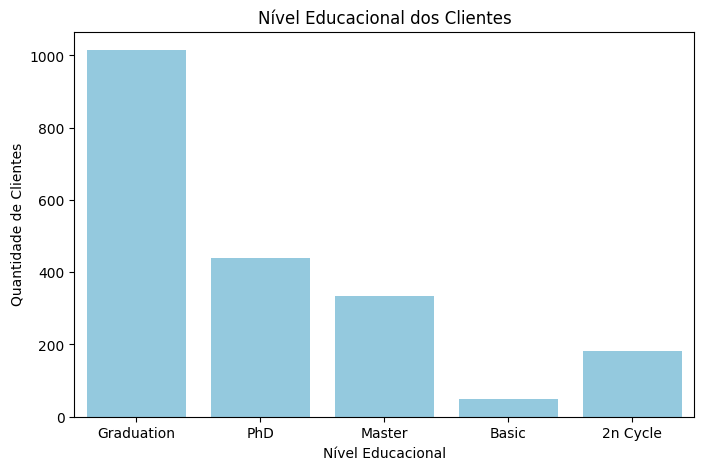

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df["education_level"], color="skyblue")  # cor única
plt.title("Nível Educacional dos Clientes")
plt.xlabel("Nível Educacional")
plt.ylabel("Quantidade de Clientes")
plt.show()

Vemos que a maior parte dos clientes da plataforma possuem nível superior.

3 - Estado Civil:

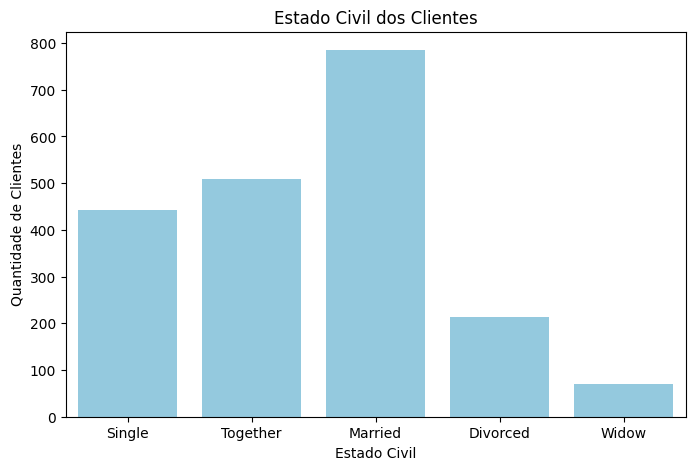

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df["marital_status"], color="skyblue")  # cor única
plt.title("Estado Civil dos Clientes")
plt.xlabel("Estado Civil")
plt.ylabel("Quantidade de Clientes")
plt.show()

A maior parte dos clientes são casados, mas clientes que vivem juntos e clientes solteiros também são uma parcela considerável de clientes.

4 - Relação entre estado civil e quantidade de filhos:

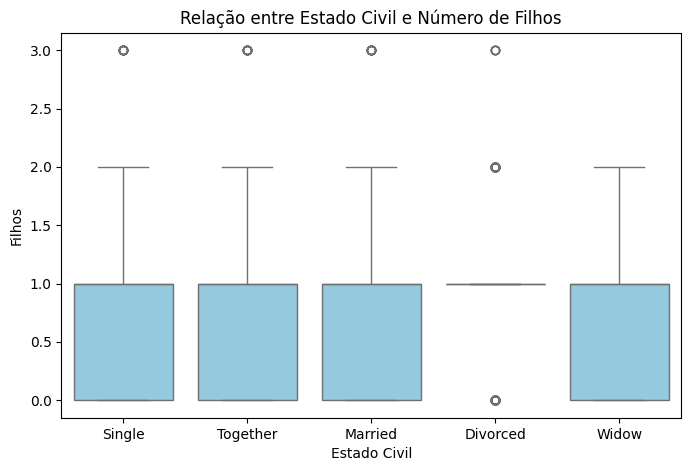

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df["marital_status"], y=df["kids"], color="skyblue")  # cor única
plt.title("Relação entre Estado Civil e Número de Filhos")
plt.xlabel("Estado Civil")
plt.ylabel("Filhos")
plt.show()

Pelo boxplot, não é possivel concluir que as pessoas casadas da nossa amostra possuem mais filhos do que as pessoas com outro estado civil. Vamos analisar a média para procurar mais informações.

In [51]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,214.0,1.023364,0.753344,0.0,1.0,1.0,1.0,3.0
Married,785.0,0.977070,0.724558,0.0,0.0,1.0,1.0,3.0
Single,443.0,0.860045,0.771850,0.0,0.0,1.0,1.0,3.0
Together,509.0,0.982318,0.748806,0.0,0.0,1.0,1.0,3.0
Widow,70.0,0.842857,0.734960,0.0,0.0,1.0,1.0,2.0


In [52]:
df.groupby("marital_status")["kids"].mean()

,kids
marital_status,
Divorced,1.023364
Married,0.977070
Single,0.860045
Together,0.982318
Widow,0.842857


A análise mostra que clientes divorciados apresentam, em média, um número de filhos ligeiramente maior que os demais grupos, seguidos por casados, pessoas que vivem em união estável, solteiros e, por último, os viúvos. Apesar dessa variação, a diferença entre os estados civis não é tão expressiva.

# A partir dos dados já explorados, surgem algumas questões importantes para entender melhor o comportamento dos clientes:

1 - Existe relação entre nível de renda e valor gasto na plataforma?

2 - O fato de ter filhos influencia nos gastos com a plataforma?

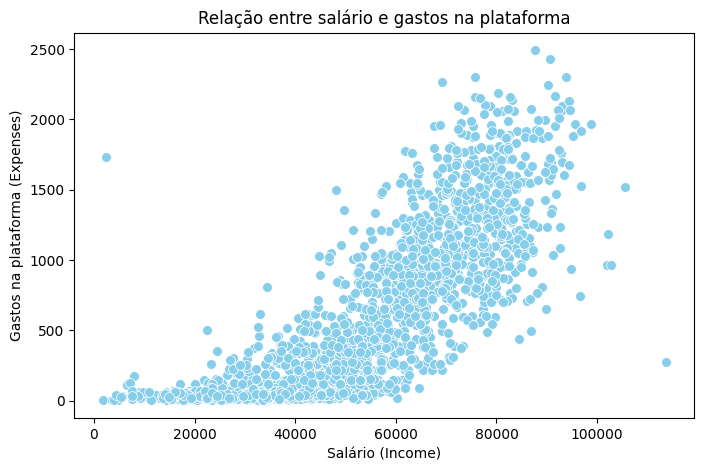

In [55]:
#Pessoas que recebem um maior salário gastam mais?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df.Income, y=df.expenses, color="skyblue", s=50)  # s é o tamanho dos pontos
plt.title("Relação entre salário e gastos na plataforma")
plt.xlabel("Salário (Income)")
plt.ylabel("Gastos na plataforma (Expenses)")
plt.show()

Pelo gráfico de dispersão notamos uma correlação positiva entre as variáveis salário(Income) e valos gasto na plataforma(Expenses), ou seja, os gastos são maiores em clientes que recebem um salário maior.

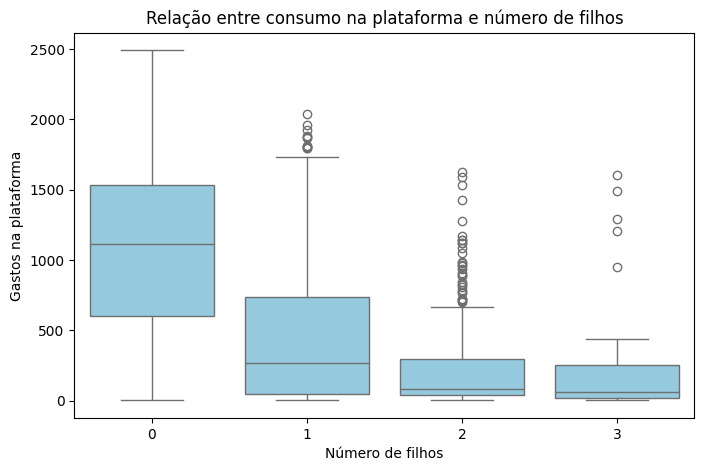

In [54]:
#As pessoas gastam mais ou menos em nossa plataforma quando tem filhos?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df.kids, y=df.expenses, color="skyblue")  # cor única
plt.title('Relação entre consumo na plataforma e número de filhos')
plt.xlabel("Número de filhos")
plt.ylabel("Gastos na plataforma")
plt.show()

A análise evidencia que clientes sem filhos apresentam gastos significativamente mais elevados na plataforma, com média acima de 1000. Já os clientes com filhos tendem a gastar menos: quem possui 1 filho apresenta consumo maior do que aqueles com 2 ou 3 filhos, cujas médias são bastante próximas.

Mesmo considerando a presença de outliers nos grupos de 2 e 3 filhos, que afetam a média, a diferença no padrão de consumo entre os grupos continua clara. Observando a mediana, notamos que ela se encontra próxima de zero (ligeiramente abaixo de 100) para os grupos com 2 e 3 filhos, enquanto no grupo sem filhos atinge cerca de 1100.

# Análise para direcionamento de Campanha de Marketing

Os resultados mostram que clientes sem filhos possuem um nível de consumo muito mais elevado na plataforma, com média superior a 1000. Já entre os clientes com filhos, o gasto médio é consideravelmente menor: aqueles com 1 filho gastam um pouco mais do que os que possuem 2 ou 3 filhos, mas a diferença entre esses últimos grupos é pequena.

Mesmo com a presença de outliers nos grupos de 2 e 3 filhos — que elevam artificialmente a média —, a tendência geral permanece clara: famílias com filhos consomem menos. Pela mediana, percebemos que ela se mantém próxima de zero (levemente abaixo de 100) para os grupos com 2 e 3 filhos, enquanto no grupo sem filhos alcança aproximadamente 1100.

Diante desse padrão, faz sentido simplificar a análise agrupando os clientes em dois grandes grupos:

- Com filhos (qualquer quantidade)

- Sem filhos

Para isso, vamos criar uma nova coluna no dataset chamada grupo_filhos, que receberá o valor 'yes' quando o cliente tiver filhos e 'no' quando não tiver.

In [3]:
# Criando uma função que atribui 'yes' se tiver filhos (kids > 0) e 'no' caso contrário
def atribuir_grupo(kids):
    if kids > 0:
        return 'yes'  # Tem filhos
    else:
        return 'no'  # Não tem filhos

# Aplicando a função e criando a nova coluna "grupo_filhos"
df['grupo_filhos'] = df['kids'].apply(atribuir_grupo)

df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,grupo_filhos
0,0,58138.0,0,0,58,635,88,546,172,88,...,NaN,NaN,1529,1441,0,Single,Graduation,0,1529,no
1,1,46344.0,1,1,38,11,1,6,2,1,...,NaN,NaN,21,15,0,Single,Graduation,2,21,yes
2,2,71613.0,0,0,26,426,49,127,111,21,...,NaN,NaN,734,692,0,Together,Graduation,0,734,no
3,3,26646.0,1,0,26,11,4,20,10,3,...,NaN,NaN,48,43,0,Together,Graduation,1,48,yes
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,5.0,407,392,0,Married,PhD,1,407,yes


#Vamos descobrir a quantidade de pessoas com filhos e sem filhos no nosso conjunto de dados:

In [4]:
# Contando a frequência de cada valor na coluna "grupo_filhos"
contagem_filhos = df['grupo_filhos'].value_counts()

# Exibindo a contagem de pessoas com e sem filhos
print('Quantidade de pessoas COM filhos:', contagem_filhos['yes'])  # Pessoas com filhos
print('Quantidade de pessoas SEM filhos:', contagem_filhos['no'])  # Pessoas sem filhos

Quantidade de pessoas COM filhos: 1577
Quantidade de pessoas SEM filhos: 628


#Descobrindo o valor médio de gastos na plataforma de pessoas sem filhos e pessoas com filhos:



In [5]:
# Agrupando por grupo_filhos e calculando a média de expenses
media_gastos = df.groupby('grupo_filhos')['expenses'].mean()

# Exibindo a média de gastos para pessoas sem filhos (grupo_filhos = no) e com filhos (grupo_filhos = yes)
print('Média de gastos para pessoas SEM filhos:')
print(media_gastos['no'])  # Média para pessoas sem filhos

print('Média de gastos para pessoas COM filhos:')
print(media_gastos['yes'])  # Média para pessoas com filhos


Média de gastos para pessoas SEM filhos:
1041.2070063694268
Média de gastos para pessoas COM filhos:
372.23715916296766


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

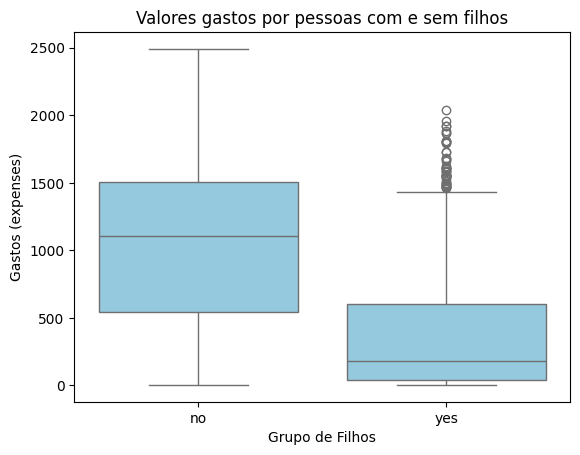

In [9]:
# boxplot dos valores gastos por pessoas com e sem filhos - cor única
sns.boxplot(x=df['grupo_filhos'],
            y=df['expenses'],
            color="skyblue")  # você pode trocar por 'red', 'orange', 'green' etc.

plt.title('Valores gastos por pessoas com e sem filhos')
plt.xlabel("Grupo de Filhos")
plt.ylabel("Gastos (expenses)")
plt.show()

Apesar da diferença observada entre as médias, nota-se que há certa sobreposição dos valores nos boxplots. Além disso, o grupo de clientes com filhos apresenta uma concentração maior de outliers. Para verificar se a diferença entre as médias é realmente significativa, vamos aplicar um teste de hipótese.

#Teste t para média de amostras independentes

In [10]:
# HO: média de no = média de yes
# HA: média de no != média de yes
# alpha = 0,05

from scipy.stats import ttest_ind

In [11]:
com_filhos = df[df['grupo_filhos'] == 'yes']['expenses']
sem_filhos = df[df['grupo_filhos'] == 'no']['expenses']
ttest_ind(com_filhos, sem_filhos)


TtestResult(statistic=np.float64(-28.902593571564687), pvalue=np.float64(5.171525024868465e-156), df=np.float64(2203.0))

Como o p-valor encontrado ficou bem abaixo do nível de significância adotado, temos evidências estatísticas para afirmar, com 95% de confiança, que os gastos médios entre clientes com filhos e sem filhos não são iguais.

2. Análise entre os diferentes grupos de clientes com filhos:
Atendendo à solicitação do time de marketing, vamos aprofundar a investigação verificando se existem diferenças no padrão de gastos (expenses) entre clientes que possuem 1, 2, 3 ou mais filhos, de forma a direcionar a campanha de maneira mais segmentada.

In [12]:
# Conferindo quantas amostras temos em cada grupo:
df.kids.value_counts()

,count
kids,
1,1112
0,628
2,415
3,50


In [13]:
# Agrupando por quantidade de filhos e calculando a média de expenses
media_gastos_filhos = df.groupby('kids')['expenses'].mean()

# Exibindo a média de gastos para pessoas com 1, 2 e 3 filhos
print('Média de gastos para pessoas com 1 filho:')
print(media_gastos_filhos[1])

print('Média de gastos para pessoas com 2 filhos:')
print(media_gastos_filhos[2])

print('Média de gastos para pessoas com 3 filhos:')
print(media_gastos_filhos[3])

Média de gastos para pessoas com 1 filho:
434.53057553956836
Média de gastos para pessoas com 2 filhos:
221.56867469879518
Média de gastos para pessoas com 3 filhos:
237.38


Observamos que a média de gastos de clientes com 2 e 3 filhos é bastante próxima, enquanto aqueles com 1 filho parecem gastar mais. Para confirmar se essas diferenças nas médias são estatisticamente significativas, aplicaremos um teste de hipótese. Como estamos comparando três grupos, a abordagem adequada é a ANOVA de Welch, que permite verificar se as médias são iguais considerando variâncias possivelmente diferentes entre os grupos.

A seguir, vamos realizar o teste da ANOVA de Welch.

In [14]:
# HO: as médias de gastos de 1,2 e 3 filhos são igual
# HA: pelo menos uma média de gastos é diferente
# alpha = 0,05

# instalando e importando o pacote pingouin
!pip install pingouin -q
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.2 MB/s eta 0:00:00


In [15]:
# criando um dataframe apenas com as pessoas com filhos
df_com_filhos = df[df['grupo_filhos'] == 'yes']
pg.welch_anova(dv= 'expenses', between= 'kids', data= df_com_filhos )


,Source,ddof1,ddof2,F,p-unc,np2
0,kids,2,132.724442,59.721904,3.178541e-19,0.051464


O teste retornou os resultados da ANOVA de Welch, incluindo a estatística F e o p-valor. Como o p-valor ficou bem abaixo do nível de significância, podemos afirmar, com 95% de confiança, que pelo menos uma das médias difere das demais.

Teste Post Hoc

Para identificar exatamente qual(is) média(s) é(são) diferente(s), aplicaremos um teste Post Hoc. Neste caso, utilizaremos o teste de Games-Howell, que é uma abordagem robusta para comparações múltiplas. Ele não exige que os grupos tenham variâncias iguais, tamanhos amostrais idênticos ou distribuições normais, sendo ideal para nosso conjunto de dados.

In [16]:
pg.pairwise_gameshowell(dv='expenses', between='kids', data= df_com_filhos)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,2.596812e-13,0.513077
1,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,2.888048e-03,0.437688
2,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,9.584865e-01,-0.052201


Quando o p-valor for maior que 0,05, não rejeitamos a hipótese nula, indicando que as médias são estatisticamente iguais. Comparando os pares de grupos, observamos:

A média do grupo 1 difere da média do grupo 2.

A média do grupo 1 difere da média do grupo 3.

A média do grupo 2 é estatisticamente igual à média do grupo 3.

Dessa forma, se a equipe de marketing optar por focar nos grupos com menor média de gastos, pode direcionar ações para grupo 2 e grupo 3 simultaneamente ou realizar campanhas conjuntas para ambos. Por outro lado, se a prioridade for o grupo com maior média de gastos, o foco deve ser no grupo 1, que possui apenas 1 filho.

Clientes que reclamam na plataforma se tornam detratores?

Agora queremos verificar se o fato de um cliente registrar reclamações na plataforma o torna um detrator (ou seja, alguém que deixa de comprar na plataforma).

Para isso, utilizaremos a coluna Complain, que indica se o cliente fez alguma reclamação. Com base nela, analisaremos se o grupo de clientes que reclamou apresenta gastos menores do que aqueles que não reclamaram.

Analisando os dados:

Média de gastos dos clientes que reclamaram

Média de gastos dos clientes que não reclamaram

In [17]:
# média de gastos de cada grupo (0 - sem reclamação, 1 - com reclamação)
df.groupby('Complain')['expenses'].mean()

,expenses
Complain,
0,564.58032
1,364.40000


In [18]:
# quantidade de pessoas que fizeram alguma reclamação
df['Complain'].value_counts()


,count
Complain,
0,2185
1,20


In [20]:
# mediana de gastos de cada um dos grupos
df.groupby('Complain')['expenses'].median()

,expenses
Complain,
0,344.0
1,77.5


In [21]:
# Variância de gastos de cada grupo:
df.groupby('Complain')['expenses'].var()

,expenses
Complain,
0,332812.911243
1,179818.778947


Vamos iniciar os testes de hipótese utilizando o teste t, que é um teste paramétrico. Observamos que estamos no limite do tamanho mínimo da amostra do grupo de clientes que reclamaram, o que nos permite assumir, de forma cautelosa, a normalidade da distribuição das amostras.

Como as variâncias dos grupos parecem diferentes, realizaremos primeiro um teste F para verificar se as variâncias são, de fato, iguais ou distintas. A partir desse resultado, poderemos decidir se aplicamos o teste t para amostras independentes com variâncias iguais ou a versão que não assume igualdade de variâncias.

#Teste F para variância:

In [22]:
import scipy.stats

# Teste f para variância
# H0: as variâncias são iguais
# HA: as variâncias são diferentes
# alpha = 0,05

df_no_complain = 2002 - 1 # graus de liberdade não reclamaram
df_complain = 19 - 1 # graus de liberdade reclamaram
F = 333853.692828 / 183991.333333

#p-valor para o teste F
1 - scipy.stats.f.cdf(F, df_no_complain, df_complain)

np.float64(0.06599439060804446)

Como o p-valor foi maior que o nível de significância, não rejeitamos a hipótese nula e concluímos que as variâncias dos dois grupos são estatisticamente iguais. Dessa forma, podemos prosseguir com a aplicação do teste t para amostras independentes assumindo variâncias iguais.

#Teste t para amostras independentes (paramétrico):

In [23]:
# HO: as médias de gastos dos grupos são iguais
# HA: as médias de gastos dos grupos são diferentes
# alpha = 0,05

grupo_no_complain = df[df['Complain'] == 0]['expenses']
grupo_complain = df[df['Complain'] == 1]['expenses']
ttest_ind(grupo_no_complain, grupo_complain)

TtestResult(statistic=np.float64(1.5478196650248075), pvalue=np.float64(0.12180935471513424), df=np.float64(2203.0))

O p-valor obtido foi maior que o nível de significância, portanto não rejeitamos a hipótese nula e concluímos que a média de gastos dos grupos que reclamaram e que não reclamaram é estatisticamente igual.

Como uma das amostras possui tamanho relativamente pequeno, faremos também um teste não-paramétrico para reforçar a análise.

Teste de Mann-Whitney (não-paramétrico)

Relembrando as hipóteses:

H0: as médias de gastos dos grupos são iguais

HA: as médias de gastos dos grupos são diferentes

Nível de significância adotado: α = 0,05

In [24]:
from scipy.stats import mannwhitneyu
mannwhitneyu(grupo_no_complain, grupo_complain)


MannwhitneyuResult(statistic=np.float64(26587.0), pvalue=np.float64(0.09469749118274157))

Como o p-valor novamente ficou acima do nosso nível de significância, não rejeitamos a hipótese nula e concluímos que a média de gastos dos grupos que reclamaram e que não reclamaram é estatisticamente igual.

Dessa forma, com base nos testes realizados, não há evidências de que clientes que registram reclamações na plataforma deixam de consumir posteriormente.
